In [4]:
!pip install fredapi

  Obtaining dependency information for fredapi from https://files.pythonhosted.org/packages/73/64/1db43417cf7ed430f104a347126b5260a1724ee9a1b7d0b1622262c9c4df/fredapi-0.5.2-py3-none-any.whl.metadata


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ax
plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', 500)

color_pal = plt.rcParams["axes.prop_cycle"].by_key()['color']
from fredapi import Fred

In [11]:
fred_key="7a8f924339f82c174983dd8f019ddf2a"

# 1. Create the Object

In [12]:
fred=Fred(api_key=fred_key)

# 2. Search For Economic Data

In [17]:
sp_search=fred.search('S&P', order_by='popularity')

In [19]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-04-08,2025-04-08,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-04-07,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-04-08 08:49:13-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-04-08,2025-04-08,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-03-25 08:12:25-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-04-08,2025-04-08,S&P 500,2015-04-08,2025-04-07,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-04-07 19:11:46-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-04-08,2025-04-08,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-04-07,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-04-08 08:49:16-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-04-08,2025-04-08,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-04-07,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-04-08 08:56:02-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


# 3. Pull Raw Data

In [23]:
sp500=fred.get_series('SP500')

<Axes: title={'center': 'S&P 500'}>

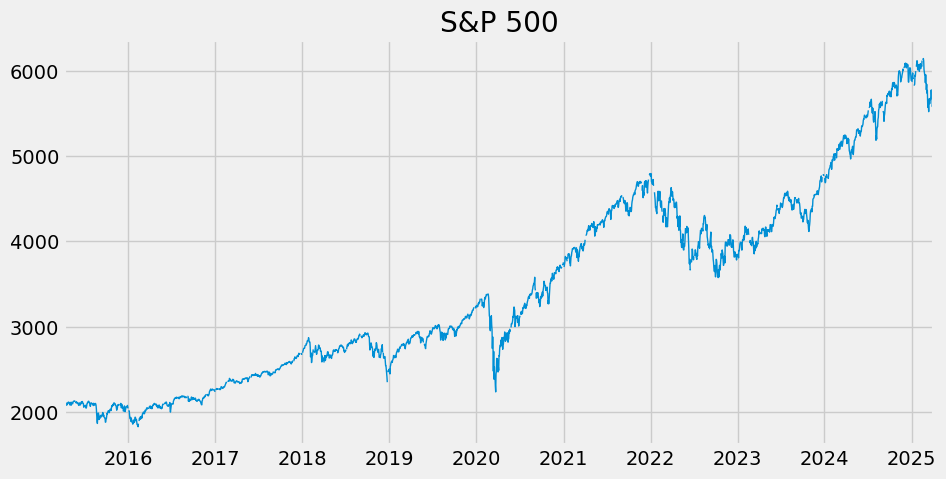

In [28]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=1)

# 4. Pull and Join Multiple Series


In [34]:
unemp_results=fred.search('unemployment')

In [35]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-04-08,2025-04-08,Unemployment Rate,1948-01-01,2025-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-04-04 07:48:18-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-04-08,2025-04-08,Unemployment Rate,1948-01-01,2025-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-04-04 07:46:05-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-04-08,2025-04-08,Unemployment Level,1948-01-01,2025-03-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-04-04 07:48:18-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2025-04-08,2025-04-08,Noncyclical Rate of Unemployment,1949-01-01,2035-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2025-03-17 15:44:05-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-04-08,2025-04-08,Continued Claims (Insured Unemployment),1967-01-07,2025-03-22,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-04-03 07:48:07-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENUC317430010,ENUC317430010,2025-04-08,2025-04-08,"Total Quarterly Wages in Manhattan, KS (MSA)",2013-01-01,2024-07-01,Quarterly,Q,Dollars,$,Not Seasonally Adjusted,NSA,2025-03-05 11:16:26-06:00,1,Total wages are the wages paid by Unemployment...
IPUEN3116L020000000,IPUEN3116L020000000,2025-04-08,2025-04-08,Labor Compensation for Manufacturing: Animal S...,1987-01-01,2023-01-01,Annual,A,Millions of Dollars,Mil. of $,Not Seasonally Adjusted,NSA,2024-04-26 09:10:19-05:00,1,"Labor compensation, defined as payroll plus su..."
IPUEN3116U110000000,IPUEN3116U110000000,2025-04-08,2025-04-08,Labor Compensation for Manufacturing: Animal S...,1987-01-01,2023-01-01,Annual,A,Index 2017=100,Index 2017=100,Not Seasonally Adjusted,NSA,2024-04-26 09:10:18-05:00,1,"Labor compensation, defined as payroll plus su..."


In [36]:
unrate= fred.get_series('UNRATE')

In [37]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-11-01    4.2
2024-12-01    4.1
2025-01-01    4.0
2025-02-01    4.1
2025-03-01    4.2
Length: 927, dtype: float64

<Axes: >

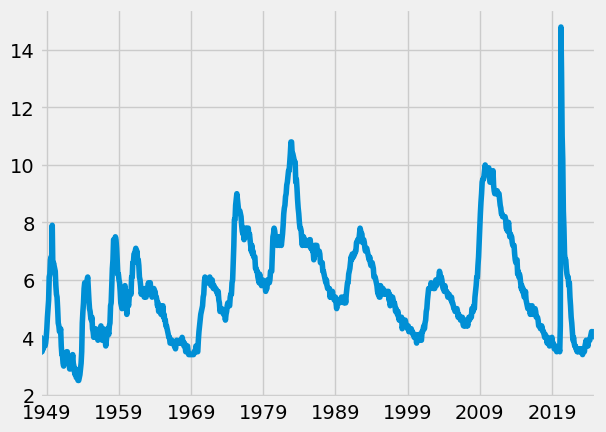

In [38]:
unrate.plot()

In [62]:
unemp_df= fred.search('unemployment rate state', filter=('frequency','Monthly'))


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-04-08,2025-04-08,Unemployment Rate,1948-01-01,2025-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-04-04 07:48:18-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-04-08,2025-04-08,Unemployment Rate,1948-01-01,2025-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-04-04 07:46:05-05:00,58,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-04-08,2025-04-08,Unemployment Rate - Black or African American,1972-01-01,2025-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-04-04 07:48:13-05:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2025-04-08,2025-04-08,Unemployment Level,1948-01-01,2025-03-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-04-04 07:48:18-05:00,71,The series comes from the 'Current Population ...
LNU03000000,LNU03000000,2025-04-08,2025-04-08,Unemployment Level,1948-01-01,2025-03-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2025-04-04 07:47:19-05:00,27,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN300190000000005,LAUCN300190000000005,2025-04-08,2025-04-08,"Employed Persons in Daniels County, MT",1990-01-01,2025-01-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-03-21 13:38:17-05:00,0,These data come from the Current Population Su...
LAUCN470950000000005,LAUCN470950000000005,2025-04-08,2025-04-08,"Employed Persons in Lake County, TN",1990-01-01,2025-01-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-03-21 13:28:44-05:00,0,These data come from the Current Population Su...
LAUCN220350000000005,LAUCN220350000000005,2025-04-08,2025-04-08,"Employed Persons in East Carroll Parish, LA",1990-01-01,2025-01-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2025-03-21 13:39:41-05:00,0,These data come from the Current Population Su...


In [65]:
unemp_df=unemp_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')

In [73]:
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [87]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR'],
      dtype='object', name='series id')

In [ ]:
#unemp_df= fred.search('unemployment rate state', filter=('frequency','Monthly'))
#unemp_df=unemp_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')
#unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [80]:
all_results=[]

for myid in unemp_df.index:
    results=fred.get_series(myid)
    results=results.to_frame(name=myid)
    all_results.append(results)


In [79]:
results.to_frame(name=myid)

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-11-01,4.2
2024-12-01,4.1
2025-01-01,4.0
2025-02-01,4.1


In [98]:
uemp_results=pd.concat(all_results, axis=1).drop(['LNS14000006','M0892AUSM156SNBR','LNS14000024','LNS14000031','M0892BUSM156SNBR','LNS14000002'
                                    ,'LNS14000009','LNS14000003','LNS14000001','LNS14027660','LNS14027662','LNS14024887','LRUN64TTUSM156S',
                                    'LRUN64TTUSM156S','LNS14032183','LNS14000012','LNS14027659'], axis=1)

In [99]:
uemp_results

,UNRATE,CAUR,TXUR,NYUR,U2RATE,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,ILUR,NJUR,GAUR,COUR,AZUR,WIUR,VAUR,KYUR,SCUR,NMUR,MNUR,TNUR,WAUR,MDUR,ORUR,WVUR,NVUR,ARUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,4.2,5.5,4.2,4.4,2.0,3.5,3.7,4.5,5.2,3.3,4.1,3.7,4.9,4.6,3.6,4.6,3.9,3.1,2.9,5.4,4.4,4.4,3.0,3.7,4.4,3.1,4.3,4.1,5.8,3.6
2024-12-01,4.1,5.5,4.2,4.4,1.9,3.4,3.7,4.5,5.2,3.3,4.1,3.7,4.9,4.6,3.6,4.6,3.8,3.1,2.9,5.3,4.4,4.3,3.0,3.7,4.4,3.1,4.3,4.1,5.8,3.6
2025-01-01,4.0,5.4,4.1,4.4,1.9,3.5,3.8,4.6,5.3,3.3,4.2,3.7,4.9,4.6,3.6,4.7,3.9,3.2,3.0,5.3,4.3,4.4,3.0,3.7,4.3,3.0,4.4,4.0,5.8,3.6
2025-02-01,4.1,5.4,4.1,4.3,1.9,3.6,3.8,4.7,5.4,3.3,4.3,3.7,4.8,4.6,3.6,4.7,4.0,3.2,3.1,5.3,4.2,4.4,3.0,3.7,4.4,3.0,4.5,3.9,5.8,3.6


In [145]:
uemp_states=uemp_results.drop(['UNRATE', 'U2RATE'], axis=1)

<Axes: >

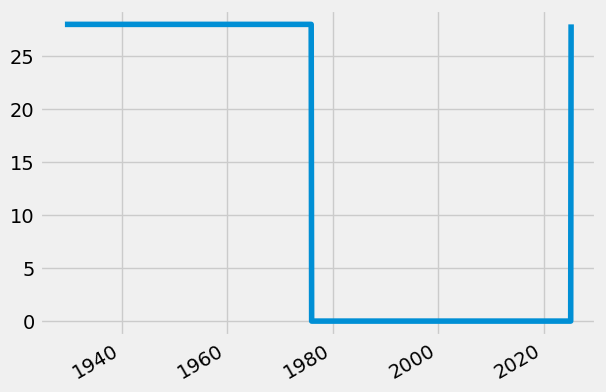

In [146]:
uemp_states.isna().sum(axis=1).plot()

In [147]:
uemp_states=uemp_states.dropna()

In [148]:
#plot ststes unemployemnt rate
px.line(uemp_states)

# pull april 2020 unemployemnt rate per state

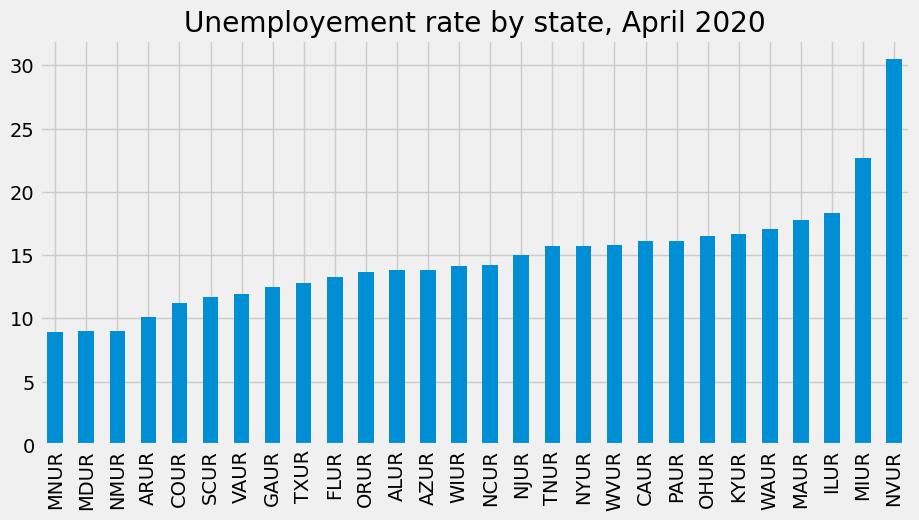

In [149]:
ax=uemp_states.loc[uemp_states.index=='2020-04-01'].T.sort_values('2020-04-01').plot(kind='bar', figsize=(10,5), title='Unemployement rate by state, April 2020')

ax.legend().remove()
plt.show()

In [150]:
id_to_state=unemp_df['title'].str.replace('Unemployment Rate in', '').drop(['UNRATE','LNS14000006','M0892AUSM156SNBR', 
       'LNS14000024','LNS14000031','M0892BUSM156SNBR', 'U2RATE','LNS14000002','LNS14000009','LNS14000003',
                 'LNS14000001', 'LNS14027660', 'LNS14027662', 'LNS14024887','LRUN64TTUSM156S','LNS14032183',
                                      'LNS14000012', 'LNS14027659','U2RATE']).to_dict()

In [151]:
id_to_state

{'CAUR': ' California',
 'TXUR': ' Texas',
 'NYUR': ' New York',
 'FLUR': ' Florida',
 'PAUR': ' Pennsylvania',
 'OHUR': ' Ohio',
 'MIUR': ' Michigan',
 'ALUR': ' Alabama',
 'MAUR': ' Massachusetts',
 'NCUR': ' North Carolina',
 'ILUR': ' Illinois',
 'NJUR': ' New Jersey',
 'GAUR': ' Georgia',
 'COUR': ' Colorado',
 'AZUR': ' Arizona',
 'WIUR': ' Wisconsin',
 'VAUR': ' Virginia',
 'KYUR': ' Kentucky',
 'SCUR': ' South Carolina',
 'NMUR': ' New Mexico',
 'MNUR': ' Minnesota',
 'TNUR': ' Tennessee',
 'WAUR': ' Washington',
 'MDUR': ' Maryland',
 'ORUR': ' Oregon',
 'WVUR': ' West Virginia',
 'NVUR': ' Nevada',
 'ARUR': ' Arkansas'}

In [153]:
uemp_states.columns=[id_to_state[c] for c in uemp_states.columns]

In [154]:
uemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas
1976-01-01,9.2,5.8,10.3,9.6,8.1,8.1,9.9,6.7,10.6,6.5,6.6,10.2,8.4,5.8,10.2,5.8,6.0,5.6,7.3,8.6,5.9,6.0,8.5,6.5,9.5,7.4,9.2,7.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.6,6.5,6.6,10.2,8.4,5.8,10.2,5.8,6.0,5.6,7.3,8.6,5.9,6.0,8.5,6.5,9.5,7.4,9.2,7.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.6,6.5,6.6,10.2,8.3,5.7,10.2,5.8,6.0,5.6,7.3,8.6,5.8,6.0,8.5,6.5,9.4,7.4,9.2,7.3
1976-04-01,9.0,5.9,10.2,9.5,8.1,7.9,9.8,6.5,10.4,6.3,6.6,10.3,8.2,5.6,10.0,5.7,5.9,5.6,7.1,8.6,5.7,6.0,8.5,6.5,9.3,7.4,9.0,7.2
1976-05-01,8.9,6.0,10.2,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.6,5.8,5.5,7.0,8.6,5.6,5.9,8.5,6.6,9.1,7.4,8.8,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,5.5,4.2,4.4,3.5,3.7,4.5,5.2,3.3,4.2,3.7,4.9,4.6,3.6,4.6,3.9,3.1,2.9,5.4,4.5,4.4,3.0,3.7,4.4,3.2,4.3,4.1,5.8,3.6
2024-11-01,5.5,4.2,4.4,3.5,3.7,4.5,5.2,3.3,4.1,3.7,4.9,4.6,3.6,4.6,3.9,3.1,2.9,5.4,4.4,4.4,3.0,3.7,4.4,3.1,4.3,4.1,5.8,3.6
2024-12-01,5.5,4.2,4.4,3.4,3.7,4.5,5.2,3.3,4.1,3.7,4.9,4.6,3.6,4.6,3.8,3.1,2.9,5.3,4.4,4.3,3.0,3.7,4.4,3.1,4.3,4.1,5.8,3.6
2025-01-01,5.4,4.1,4.4,3.5,3.8,4.6,5.3,3.3,4.2,3.7,4.9,4.6,3.6,4.7,3.9,3.2,3.0,5.3,4.3,4.4,3.0,3.7,4.3,3.0,4.4,4.0,5.8,3.6


In [155]:
#plot ststes unemployemnt rate
px.line(uemp_states)

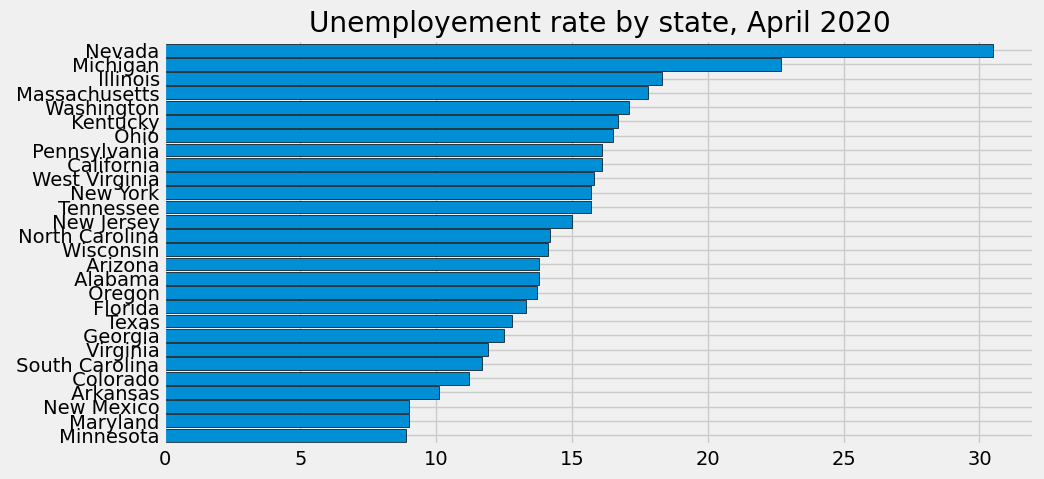

In [159]:
ax=uemp_states.loc[uemp_states.index=='2020-04-01'].T.sort_values('2020-04-01').plot(kind='barh', figsize=(10,5), width=0.9,edgecolor='black', title='Unemployement rate by state, April 2020')

ax.legend().remove()
plt.show()

# Pull Participation Rate

In [162]:
part_df= fred.search('participation rate state', filter=('frequency','Monthly'))
part_df=part_df.query('seasonal_adjustment=="Seasonally Adjusted" and units=="Percent"')

In [163]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2025-04-08,2025-04-08,Labor Force Participation Rate,1948-01-01,2025-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-04-04 07:48:35-05:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2025-04-08,2025-04-08,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2025-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-04-04 07:48:33-05:00,70,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2025-04-08,2025-04-08,Labor Force Participation Rate - Women,1948-01-01,2025-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-04-04 07:48:34-05:00,66,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2025-04-08,2025-04-08,Labor Force Participation Rate - Men,1948-01-01,2025-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-04-04 07:48:34-05:00,61,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2025-04-08,2025-04-08,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2025-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-04-04 07:48:33-05:00,54,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRIN74MAUSM156S,LRIN74MAUSM156S,2025-04-08,2025-04-08,Infra-Annual Labor Statistics: Inactivity Rate...,1981-01-01,2025-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-17 14:15:11-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
LRIN64MAUSM156S,LRIN64MAUSM156S,2025-04-08,2025-04-08,Infra-Annual Labor Statistics: Inactivity Rate...,1977-01-01,2025-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-17 14:17:46-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
LRIN64FEUSM156S,LRIN64FEUSM156S,2025-04-08,2025-04-08,Infra-Annual Labor Statistics: Inactivity Rate...,1977-01-01,2025-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-17 14:15:16-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...


In [ ]:
id_to_states=part_df['title'].str.replace('')

In [173]:
uemp_states.columns = uemp_states.columns.str.strip()

<Axes: >

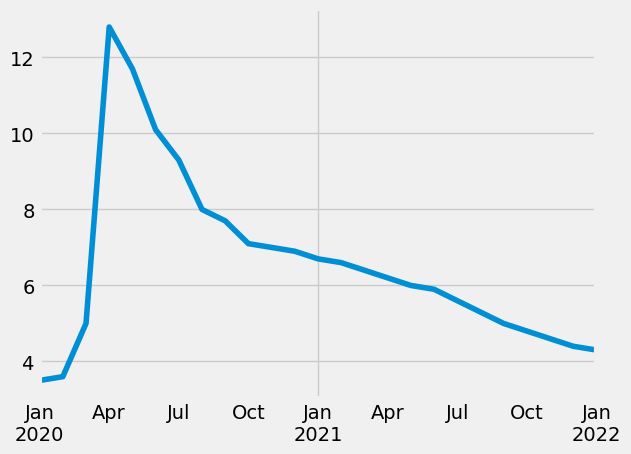

In [178]:
uemp_states.query('index>=2020 and index<=2022')['Texas'].plot()

DatetimeIndex(['1976-01-01', '1976-02-01', '1976-03-01', '1976-04-01',
               '1976-05-01', '1976-06-01', '1976-07-01', '1976-08-01',
               '1976-09-01', '1976-10-01',
               ...
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
               '2025-01-01', '2025-02-01'],
              dtype='datetime64[ns]', length=590, freq=None)


KeyError: 'Texas'